<a href="https://colab.research.google.com/github/Abdulmajeed1234/Business-Data-Insights-for-Financial-Decision-Making/blob/main/Business_Data_Insights_for_Financial_Decision_Making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [ ]:
df = pd.read_csv("/content/business_transactions_large.csv")
df.head()


,Transaction ID,Transaction Date,Category,Amount,Payment Method
0,469afe8c,2023-03-24,Entertainment,16650.96,UPI
1,befc014d,2023-06-22,Entertainment,2886.47,Bank Transfer
2,6e667371,2023-03-20,Groceries,23037.02,UPI
3,e29b9c88,2023-05-01,Groceries,19428.97,Bank Transfer
4,16544524,2024-05-18,Shopping,8914.07,Credit Card


In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction ID    100000 non-null  object 
 1   Transaction Date  100000 non-null  object 
 2   Category          100000 non-null  object 
 3   Amount            100000 non-null  float64
 4   Payment Method    100000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB
None
Transaction ID      0
Transaction Date    0
Category            0
Amount              0
Payment Method      0
dtype: int64


In [ ]:
df.fillna(method='ffill', inplace=True)


<ipython-input-4-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Amount'] = df['Amount'].astype(float)


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
conn = sqlite3.connect("financial_data.db")
df.to_sql("transactions", conn, if_exists="replace", index=False)


100000

In [ ]:
query = "SELECT Category, SUM(Amount) as Total_Amount FROM transactions GROUP BY Category"
sql_df = pd.read_sql(query, conn)
print(sql_df)


        Category  Total_Amount
0         Dining  2.793852e+08
1      Education  2.802947e+08
2  Entertainment  2.775160e+08
3      Groceries  2.810309e+08
4     Healthcare  2.739745e+08
5     Investment  2.792822e+08
6           Rent  2.754767e+08
7       Shopping  2.763736e+08
8      Utilities  2.799083e+08


In [ ]:
top_categories = df.groupby("Category")["Amount"].sum().sort_values(ascending=False).head(5)
print(top_categories)


Category
Groceries     2.810309e+08
Education     2.802947e+08
Utilities     2.799083e+08
Dining        2.793852e+08
Investment    2.792822e+08
Name: Amount, dtype: float64


In [ ]:
df['Month'] = df['Transaction Date'].dt.month
monthly_trend = df.groupby("Month")["Amount"].sum()


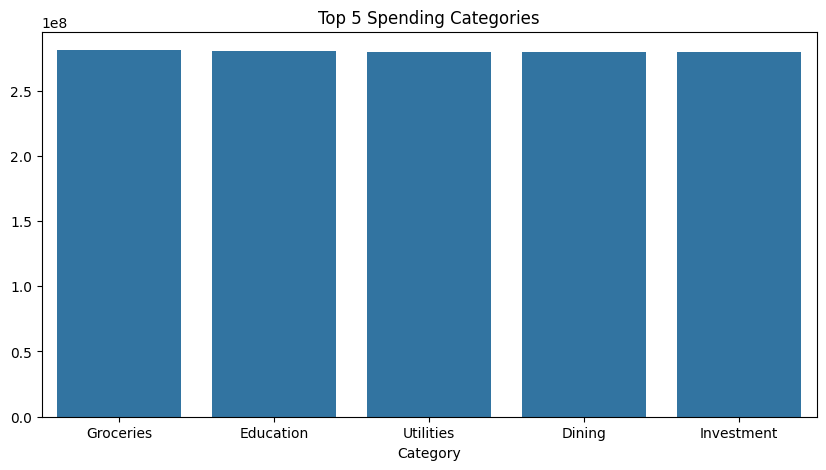

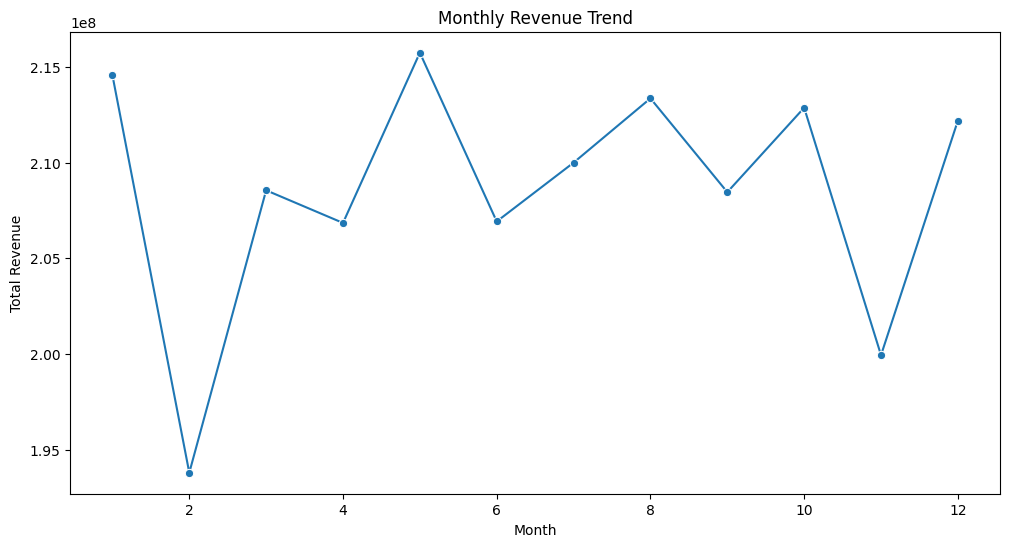

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top 5 Spending Categories")
plt.show()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
df.to_csv("cleaned_financial_data.csv", index=False)
